In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
df=pd.read_csv("/content/drive/MyDrive/Fuel Cosumption - Sheet1.csv")

In [68]:
df.shape

(639, 10)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [70]:
df.isnull().sum()

,0
Year,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
COEMISSIONS,0


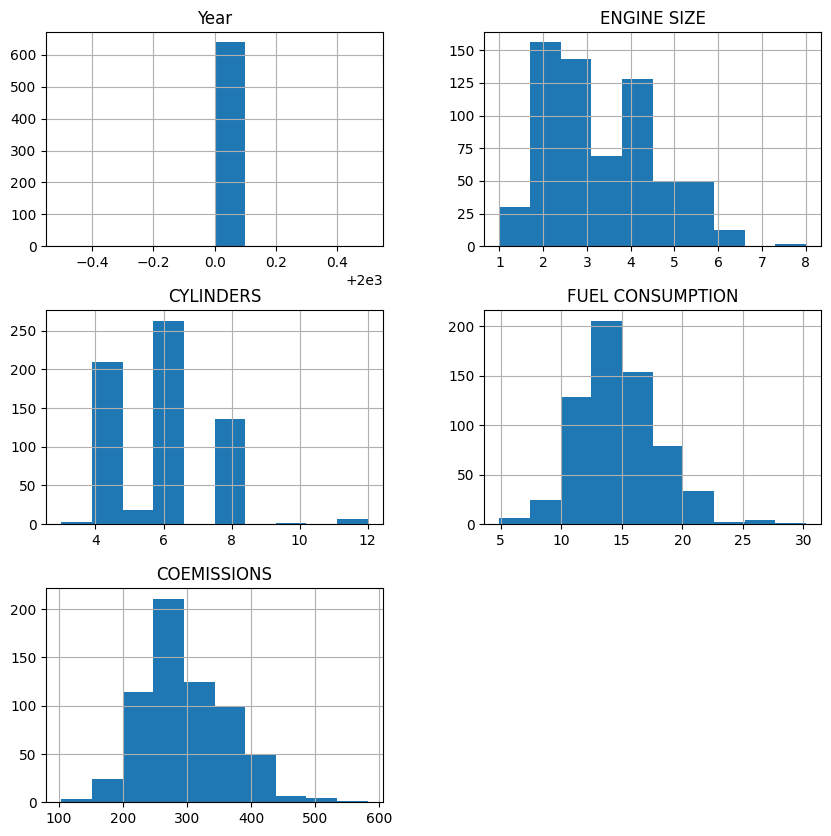

In [71]:
df.hist(figsize=(10,10))
plt.show()

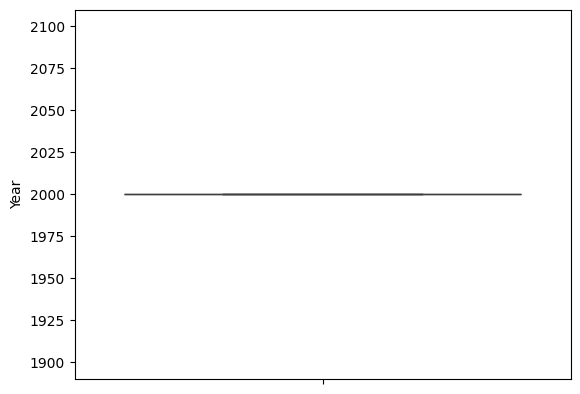

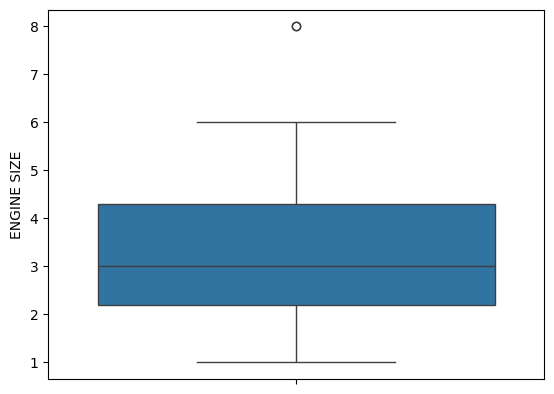

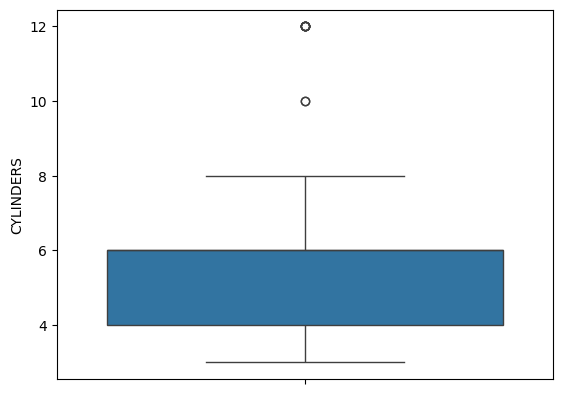

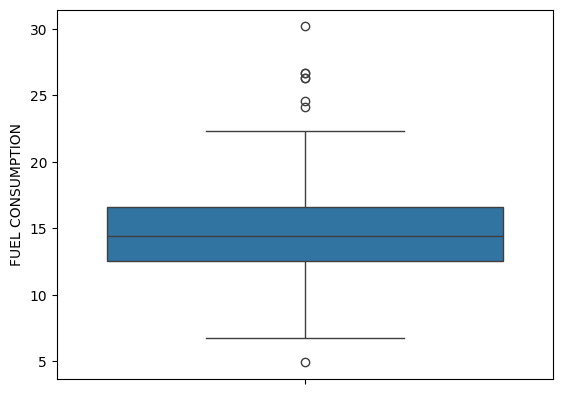

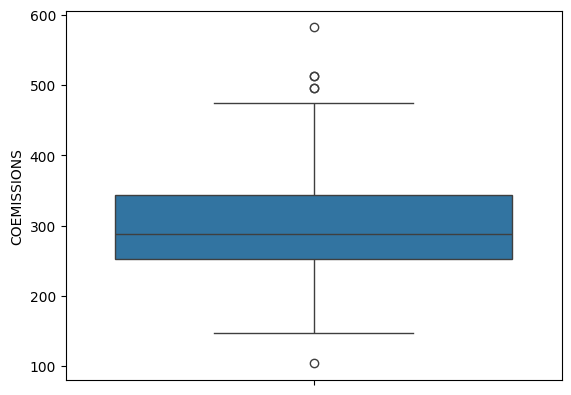

In [72]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(df[i])
  plt.show()


In [73]:
def wiskers(col):
  q1,q3=df[col].quantile([0.25,0.75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw
  for i in ['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']:
    lw,uw=wiskers(i)
    df[i]=np.where(df[i]>uw,uw,df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    for i in ['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']:
     sns.boxplot(df[i])
     plt.show()


In [74]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['VEHICLE CLASS', 'MAKE', 'MODEL',
                    'TRANSMISSION', 'FUEL']
for col in categorical_cols:
    df[col] = df[col].astype(str)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
X=df_encoded.drop('COEMISSIONS',axis=1)
y=df_encoded['COEMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
model=LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [78]:
y_pred = model.predict(X_test)
y_pred

array([269.77892695, 367.49156835, 289.798543  , 496.95203439,
       285.79247511, 266.72494332, 292.37274601, 325.26062655,
       421.48426762, 331.00545993, 222.32872669, 240.29746129,
       308.44969187, 228.31971269, 248.9478376 , 202.33350865,
       264.71970298, 248.9478376 , 193.56164328, 228.00008437,
       284.13148306, 362.70778259, 311.99401545, 248.86779008,
       316.65697468, 421.57274314, 424.5239411 , 236.8811205 ,
       177.10537402, 295.90043008, 298.32712604, 279.58660209,
       388.63678727, 357.14172236, 294.27496364, 232.25737852,
       271.10431274, 381.00918211, 247.22858728, 234.33849614,
       294.94110837, 186.06754317, 566.054784  , 265.01156888,
       392.03157692, 262.70916661, 312.63224148, 361.60074698,
       310.48936929, 253.8954221 , 287.54343963, 256.06954897,
       303.29113637, 284.9647009 , 314.2244439 , 408.40264232,
       374.24868408, 243.43835672, 509.32362196, 392.10175945,
       379.6682288 , 339.50350382, 359.05518643, 228.84

In [79]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Coefficients: [-2.99939008e-14  2.72326715e+00 -1.37253221e+00  1.77186537e+01
 -4.43521403e+00 -3.47589232e+00 -1.81372231e+00  3.61793348e+00
  9.35190165e-02  1.47261565e+01 -1.72492780e+00  3.21952458e-02
 -3.47573278e+00  1.46894999e+01  3.57354108e+00  1.08418756e+01
  1.58472737e+01 -1.29590486e+00 -2.82092729e+00 -6.78051369e+00
 -5.71486399e+00 -9.91800657e-01 -2.32664824e+00 -4.60263952e+00
 -6.56944669e+00  4.71177432e+00 -2.02279579e+00  2.17643934e+00
 -1.31306953e+00 -2.49039469e+00  5.00023726e-02  3.87516275e-01
  1.56061819e+00 -1.90481861e+00  4.79075379e+00  4.59165631e+00
  7.41122689e-01 -1.24081240e+00  4.21371969e-01 -1.01241193e+00
  2.38892903e+00 -5.28747543e+00  8.57679668e-01 -7.52575234e+00
 -3.48096451e+00  3.10765236e-01 -7.06053602e+00 -2.79891668e+00
 -1.37046817e+00 -1.61678965e+00  8.60144116e+00 -2.04536924e+00
 -6.21724894e-15  9.07901747e-01  1.79180246e+00  3.73015672e+00
 -3.39536060e+00 -3.39536060e+00 -3.59827343e+00 -4.14003505e+00
  6.6638087

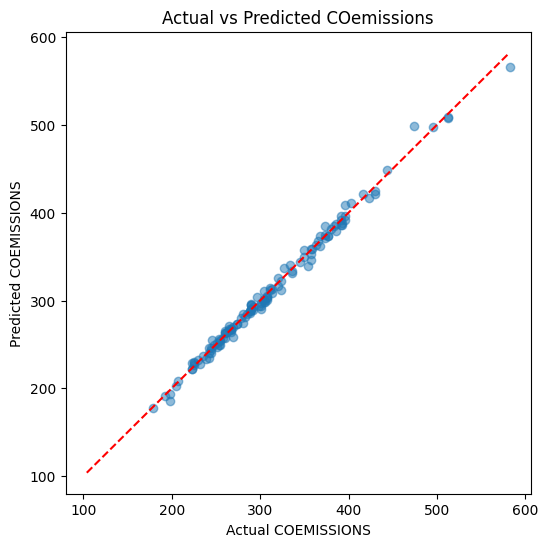

In [80]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual COEMISSIONS")
plt.ylabel("Predicted COEMISSIONS")
plt.title("Actual vs Predicted COemissions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
